In [251]:
import numpy as np
import matplotlib.pyplot as plt
import random
from random import sample

In [252]:
#Change Making problem with a simple solution
def GreedySubset(A):
    
    picks = []
    
    A.sort(key=lambda e: e[-1])
    
    picks.append(A[0])
    
    for i in range(1,len(A)):
        if A[i][0] >= picks[-1][-1]:
            picks.append(A[i])
    
    return picks

In [253]:
A = [[3, 8], [5, 7], [12, 14], [3, 5], [1, 4], [5, 9], [6, 10], [8, 11], [0, 6], [2, 13], [8, 12]]

GreedySubset(A)

[[1, 4], [5, 7], [8, 11], [12, 14]]

In [254]:
class Item:
    def __init__(self, name, value, weight):
        self.name = name
        self.value = value
        self.weight = weight
        self.avgCost = value/weight

In [260]:
def GreedyKnapsack(itemList, capacity, print_solution=False):
    
    iterations = 0
    valuePicked = 0
    
    #Insertion Sort
    for i in range(0, len(itemList)):
        v = itemList[i]
        j = i-1
        iterations += 1
        while j >= 0 and itemList[j].avgCost < v.avgCost:
            iterations += 1
            itemList[j+1] = itemList[j]
            j -= 1
        itemList[j+1] = v
    
    for item in itemList:
        iterations += 1
        if item.weight <= capacity:
            valuePicked = valuePicked + item.value
            capacity -= item.weight
    
    if(print_solution):
        print(valuePicked)
        
    return iterations
    
def DynamicKnapsack(itemList, capacity, print_solution=False):
    
    iterations = 0
    
    K = [[0] * (capacity+1)] * (len(itemList)+1)

    for i in range((len(itemList)+1)):
        for j in range((capacity)+1):
            iterations += 1
            if i == 0 or j == 0: # set 0th row and column to 0
                K[i][j] = 0
            elif itemList[i-1].weight <= j:
                K[i][j] = max(itemList[i-1].value + K[i-1][j-itemList[i-1].weight], K[i-1][j]) 
                K[i][j] = K[i-1][j]
     
    if(print_solution):
        print(K[-1][-1])
    
    return iterations

In [ ]:
itemList = [
    Item("Item 1", 3, 40),
    Item("Item 2", 5, 50),
    Item("Item 3", 1, 20),
    Item("Item 4", 2, 10),
    Item("Item 5", 4, 30)
]

capacity = 75
 
DynamicKnapsack(itemList, capacity)
GreedyKnapsack(itemList, capacity)

In [262]:
x = [10, 25, 50, 75, 100] # Different input sizes
samples = 100             # Quantity of samples to be averaged
greedy_knap = []          # Quantity of iterations - Greedy Knapsack
dynamic_knap = []         # Quantity of iterations - Dynamic Knapsack

In [263]:
# Calculate the average iterations of all approaches
for i in range(len(x)):
    
    it1, it2 = 0,0
    iterations1, iterations2 = 0,0
    
    for k in range (0,samples):
        
        itemList = []
        itemList2 = []

        for j in range(0,x[i]):
            value = random.randint(1, x[i])
            weight = random.randint(1, x[i])*10
            itemList.append(Item("x",value,weight))
            itemList2.append(Item("x",value,weight))
            
        capacity = random.randint(x[i], 2*x[i])*10

        iterations1 = GreedyKnapsack(itemList, capacity)       
        iterations2 = DynamicKnapsack(itemList2, capacity)

        it1 = it1 + iterations1
        it2 = it2 + iterations2
        
    greedy_knap.append(it1/samples)
    dynamic_knap.append(it2/samples)

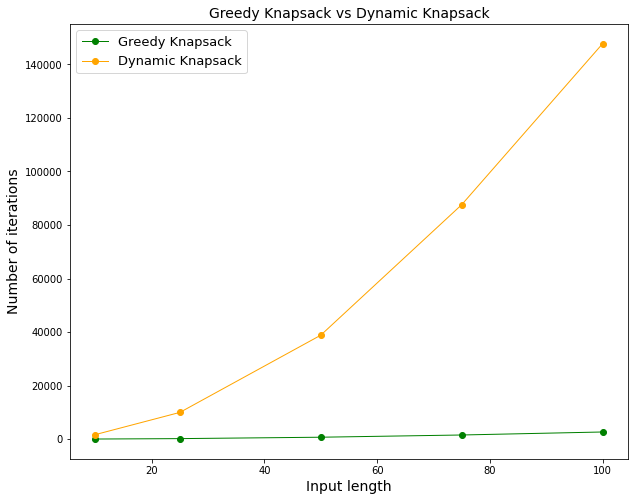

In [264]:
# Plots the complexity graph
plt.figure(figsize=(10, 8))
plt.plot(x,greedy_knap, c="green", ls="-", lw = 1, marker="o", label="Greedy Knapsack")
plt.plot(x,dynamic_knap, c="orange", ls="-",  lw = 1, marker="o", label="Dynamic Knapsack")
plt.title("Greedy Knapsack vs Dynamic Knapsack",fontsize=14)
plt.xlabel("Input length",fontsize=14)
plt.ylabel("Number of iterations",fontsize=14)
plt.legend(fontsize=13)
plt.show()